In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

dir = "/content/drive/MyDrive/Tugas_Akhir/dataset"

Mounted at /content/drive/


Total Files : 1398


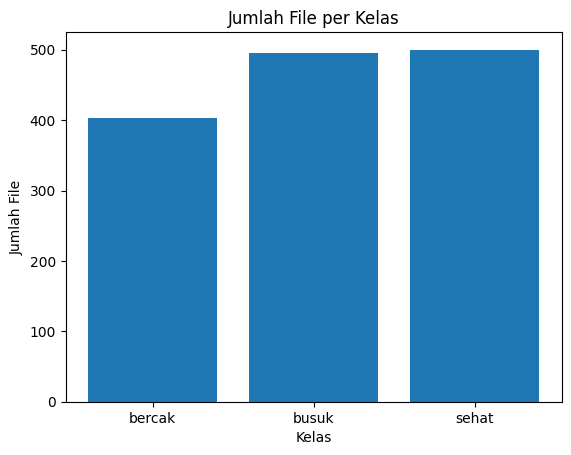

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt
import os

label = {}
total_files = 0
for i in os.listdir(dir):
    counting = len(os.listdir(os.path.join(dir, i)))
    label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

plt.bar(label.keys(), label.values());
plt.title("Jumlah File per Kelas");
plt.xlabel('Kelas');
plt.ylabel('Jumlah File');

In [ ]:
import tensorflow as tf

data = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3
)

In [ ]:
image_size = (200,200)
batch_size = 32
seed = 999

train_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='training',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='validation',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 980 images belonging to 3 classes.
Found 418 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomZoom(0.5),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.5),
    tf.keras.layers.Rescaling(1./255)
  ]
)



In [ ]:
augmentation = tf.keras.models.Sequential(data_augmentation)

# **Modeling**

Skenario 1 (optimizer adam, epoch : 5, learning rate = 0.001)

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(image_size[0], image_size[1], 3),
                                                        pooling='max')
base_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
densenet_model_1 = densenet_model
densenet_model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )

In [ ]:
densenet_hist = densenet_model_1.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 667s 21s/step - loss: 0.9414 - accuracy: 0.6327 - val_loss: 0.4863 - val_accuracy: 0.8086
Epoch 2/5
31/31 [==============================] - 345s 11s/step - loss: 0.3610 - accuracy: 0.8500 - val_loss: 0.4091 - val_accuracy: 0.8541
Epoch 3/5
31/31 [==============================] - 269s 9s/step - loss: 0.3615 - accuracy: 0.8653 - val_loss: 0.3934 - val_accuracy: 0.8636
Epoch 4/5
31/31 [==============================] - 273s 9s/step - loss: 0.2371 - accuracy: 0.9020 - val_loss: 0.3542 - val_accuracy: 0.8660
Epoch 5/5
31/31 [==============================] - 267s 9s/step - loss: 0.2447 - accuracy: 0.9071 - val_loss: 0.2846 - val_accuracy: 0.9067


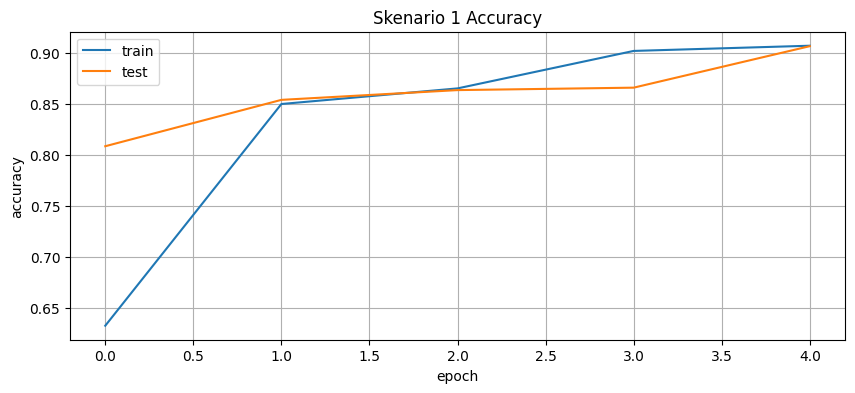

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('Skenario 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 2 (optimizer : RMSprop, Epoch : 5, learning rate : 0.001)

In [ ]:
model_skenario_2 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
data_augmentation = tf.keras.Sequential(

    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomShear(0.2)

    ]
)

In [ ]:

model_skenario_2 = densenet_model
model_skenario_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_2 = model_skenario_2.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 286s 9s/step - loss: 0.9389 - accuracy: 0.6847 - val_loss: 0.5008 - val_accuracy: 0.8110
Epoch 2/5
31/31 [==============================] - 262s 8s/step - loss: 0.5479 - accuracy: 0.7857 - val_loss: 0.4439 - val_accuracy: 0.8660
Epoch 3/5
31/31 [==============================] - 266s 9s/step - loss: 0.3492 - accuracy: 0.8612 - val_loss: 0.3852 - val_accuracy: 0.8589
Epoch 4/5
31/31 [==============================] - 265s 9s/step - loss: 0.3216 - accuracy: 0.8735 - val_loss: 0.2572 - val_accuracy: 0.8923
Epoch 5/5
31/31 [==============================] - 265s 9s/step - loss: 0.2993 - accuracy: 0.8847 - val_loss: 0.2838 - val_accuracy: 0.9067


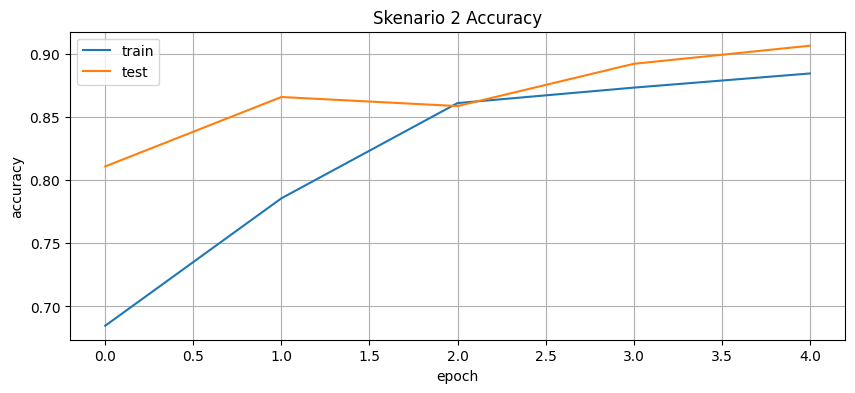

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_2.history['accuracy'])
plt.plot(model_hist_2.history['val_accuracy'])
plt.title('Skenario 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 2 (optimizer : RMSprop, Epoch : 5, learning rate 0.001)

In [ ]:
model_skenario_3 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model_skenario_3 = densenet_model
model_skenario_3.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
  )

model_hist_3 = model_skenario_3.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 281s 9s/step - loss: 3.7417 - accuracy: 0.6276 - val_loss: 1.1808 - val_accuracy: 0.7871
Epoch 2/5
31/31 [==============================] - 264s 9s/step - loss: 0.7748 - accuracy: 0.8490 - val_loss: 0.3738 - val_accuracy: 0.9211
Epoch 3/5
31/31 [==============================] - 261s 9s/step - loss: 0.5807 - accuracy: 0.8776 - val_loss: 0.9554 - val_accuracy: 0.8158
Epoch 4/5
31/31 [==============================] - 264s 9s/step - loss: 0.6935 - accuracy: 0.8582 - val_loss: 0.3446 - val_accuracy: 0.9163
Epoch 5/5
31/31 [==============================] - 264s 9s/step - loss: 0.3165 - accuracy: 0.9102 - val_loss: 0.3768 - val_accuracy: 0.9211


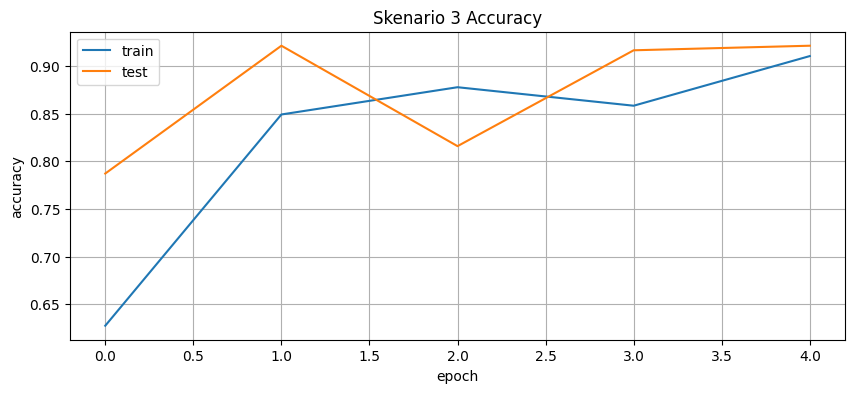

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_3.history['accuracy'])
plt.plot(model_hist_3.history['val_accuracy'])
plt.title('Skenario 3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

In [ ]:
model_skenario_a = densenet_model
model_skenario_a.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.b(learning_rate=c),
    metrics=['accuracy']
  )

model_hist_a = model_skenario_3.fit(
    train_data,
    epochs=d,
    validation_data = valid_data
)